In [4]:
import pandas as pd

def convert_to_three_decimal_places(input_str):
    try:
        # Convert string to float
        float_value = float(input_str)

        # Format float to three significant figures
        #formatted_value = "{:.3g}".format(float_value)

        formatted_value = round(float_value, 3)

        return float(formatted_value)
    except ValueError:
        print("Invalid input. Please enter a valid number.")


memtable_type = ["SkipList", "Vector", "Hash SkipList", "Hash Linklist"]
data_rows = []
E = [64, 128, 256, 1024]
for m_value in range(1,5):
    for E_value in E:
        outfile = "/home/cc/LSMMemoryProfiling/development/rocksdb/examples/__working_branch/outputs/E_varied/out_m_"+str(m_value)+"_E_"+str(E_value)+".txt"
        f = open(outfile, "r")
        lines = f.readlines()
        counter = 0
        for line in lines:
            if line.startswith("Total time taken"):
                break
            counter+=1
        #print(lines[counter])
        array = []
        array.append(memtable_type[m_value-1])
        array.append(E_value)
        for i in range(counter, counter+7):
            #print(lines[i])
            line = lines[i].split(" ")
            time = line[-2]
            time = convert_to_three_decimal_places(time)
            array.append(time)
        #print(time_array)
        data_rows.append(array)
data_rows
# Define column names
column_names = ['Memtable Type','E Value', 'Total(s)', 'Time for inserts(s)', 'Time for queries(s)', 'Time for updates(s)', 'Time for deletes(s)', 'Time for range deletes(s)', 'Time for range queries']

# # Create an empty list to store arrays (data rows)
# data_rows = [
#     ['John', 25, 'New York'],
#     ['Alice', 30, 'Los Angeles'],
#     ['Bob', 22, 'Chicago']
# ]

# # Create DataFrame from the list of arrays
df = pd.DataFrame(data_rows, columns=column_names)

# # Display the resulting DataFrame
df


,Memtable Type,E Value,Total(s),Time for inserts(s),Time for queries(s),Time for updates(s),Time for deletes(s),Time for range deletes(s),Time for range queries
0,SkipList,64,0.339,0.234,0.016,0.083,0.0,0.0,0.0
1,SkipList,128,0.327,0.227,0.015,0.078,0.0,0.0,0.0
2,SkipList,256,0.336,0.228,0.017,0.084,0.0,0.0,0.0
3,SkipList,1024,0.333,0.222,0.014,0.092,0.0,0.0,0.0
4,Vector,64,6.802,0.108,6.658,0.031,0.0,0.0,0.0
5,Vector,128,6.754,0.106,6.612,0.030,0.0,0.0,0.0
6,Vector,256,6.782,0.106,6.640,0.030,0.0,0.0,0.0
7,Vector,1024,6.777,0.107,6.634,0.031,0.0,0.0,0.0
8,Hash SkipList,64,0.336,0.227,0.017,0.084,0.0,0.0,0.0
9,Hash SkipList,128,0.328,0.229,0.015,0.078,0.0,0.0,0.0


In [12]:
#set(df["E Value"])
filtered_df = df[df['Memtable Type'] == 'SkipList']
filtered_df

,Memtable Type,E Value,Total(s),Time for inserts(s),Time for queries(s),Time for updates(s),Time for deletes(s),Time for range deletes(s),Time for range queries
0,SkipList,64,0.339,0.234,0.016,0.083,0.0,0.0,0.0
1,SkipList,128,0.327,0.227,0.015,0.078,0.0,0.0,0.0
2,SkipList,256,0.336,0.228,0.017,0.084,0.0,0.0,0.0
3,SkipList,1024,0.333,0.222,0.014,0.092,0.0,0.0,0.0


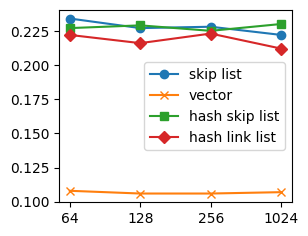

In [24]:
import matplotlib.pyplot as plt 
  
# create data 
#x = [10,20,30,40,50] 
#y = [30,30,30,30,30] 
#x = list(set(df["E Value"]))
x = ['64', '128', '256', '1024']
df_skiplist = df[df['Memtable Type'] == 'SkipList']
y1 = df_skiplist['Time for inserts(s)']  

df_vector = df[df['Memtable Type'] == 'Vector']
y2 = df_vector['Time for inserts(s)'] 

df_hash_skiplist = df[df['Memtable Type'] == 'Hash SkipList']
y3 = df_hash_skiplist['Time for inserts(s)'] 

df_hash_linklist = df[df['Memtable Type'] == 'Hash Linklist']
y4 = df_hash_linklist['Time for inserts(s)'] 

# plot lines 
plt.figure(figsize=(3,2.5))
plt.plot(x, y1, label = "skip list", marker = 'o') 
plt.plot(x, y2, label = "vector", marker = 'x') 
plt.plot(x, y3, label = "hash skip list", marker = 's') 
plt.plot(x, y4, label = "hash link list", marker = 'D') 
#plt.plot(y, x, label = "line 2") 


plt.legend() 
plt.show()

In [26]:
def get_y_vals(Metric):
    df_skiplist = df[df['Memtable Type'] == 'SkipList']
    y1 = df_skiplist[Metric]  

    df_vector = df[df['Memtable Type'] == 'Vector']
    y2 = df_vector[Metric] 

    df_hash_skiplist = df[df['Memtable Type'] == 'Hash SkipList']
    y3 = df_hash_skiplist[Metric] 

    df_hash_linklist = df[df['Memtable Type'] == 'Hash Linklist']
    y4 = df_hash_linklist[Metric] 

    return y1,y2,y3,y4

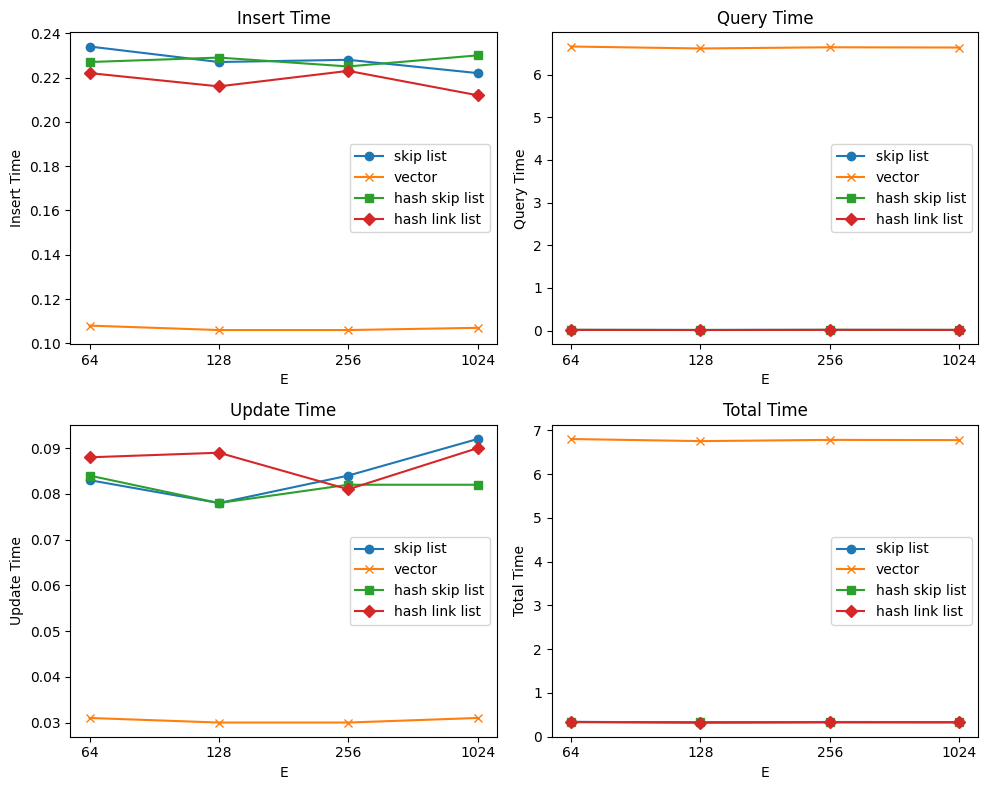

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
# x = np.linspace(0, 2 * np.pi, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
x = ['64', '128', '256', '1024']


# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot on the first subplot
y1,y2,y3,y4 = get_y_vals('Time for inserts(s)')
axes[0,0].plot(x, y1, label='skip list', marker ='o')
axes[0,0].plot(x, y2, label = "vector", marker = 'x')
axes[0,0].plot(x, y3, label='hash skip list', marker ='s')
axes[0,0].plot(x, y4, label='hash link list', marker='D')
axes[0,0].set_title('Insert Time')
axes[0, 0].set_xlabel('E')
axes[0, 0].set_ylabel('Insert Time')
axes[0,0].legend()

# Plot on the second subplot
#axes[1].plot(x, y2, label='cos(x)', color='orange')
#axes[1].set_title('Cosine Function')
y1,y2,y3,y4 = get_y_vals('Time for queries(s)')
axes[0,1].plot(x, y1, label='skip list', marker ='o')
axes[0,1].plot(x, y2, label = "vector", marker = 'x')
axes[0,1].plot(x, y3, label='hash skip list', marker ='s')
axes[0,1].plot(x, y4, label='hash link list', marker='D')
axes[0,1].set_title('Query Time')
axes[0, 1].set_xlabel('E')
axes[0, 1].set_ylabel('Query Time')
axes[0,1].legend()

# Plot on the third subplot
y1,y2,y3,y4 = get_y_vals('Time for updates(s)')
axes[1, 0].plot(x, y1, label='skip list', marker ='o')
axes[1, 0].plot(x, y2, label = "vector", marker = 'x')
axes[1, 0].plot(x, y3, label='hash skip list', marker ='s')
axes[1, 0].plot(x, y4, label='hash link list', marker='D')
axes[1, 0].set_title('Update Time')
axes[1, 0].set_xlabel('E')
axes[1, 0].set_ylabel('Update Time')
axes[1, 0].legend()


# Plot on the fourth subplot
y1,y2,y3,y4 = get_y_vals('Total(s)')
axes[1, 1].plot(x, y1, label='skip list', marker ='o')
axes[1, 1].plot(x, y2, label = "vector", marker = 'x')
axes[1, 1].plot(x, y3, label='hash skip list', marker ='s')
axes[1, 1].plot(x, y4, label='hash link list', marker='D')
axes[1, 1].set_title('Total Time')
axes[1, 1].set_xlabel('E')
axes[1, 1].set_ylabel('Total Time')
axes[1, 1].legend()

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plots
plt.show()
plt.savefig("E varied plots.png")


In [ ]:
#workload parameters: T, P,B,E,M, F, m, C
T = [10,12] #size ratio 
P = [1024, 2048 ,4096] # Buffer size in pages
B = [4,8,16] #entries_per_page 
E = [128, 256, 1024] #Entry size (B)
M = [8,16,32, 64] #Memory size (16 MB)
F = [64,128,256] #file size (KB)
m = [1,2,3,4] #memtable factory
C = [1,2,3,4] #compaction style
#./generate_workload.sh -I 10000 -U 3000 -Q 4000
    




In [ ]:
#Graph Plotting
